In [21]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation

In [22]:
tf.test.is_gpu_available()

False

In [23]:
batchsize=8

In [24]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

train_data= train_datagen.flow_from_directory(r'E:\Major Projects\Driver-Drowsiness-Detection-using-Deep-Learning-main\MRL Eye Data\Prepared Data\Train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(r'E:\Major Projects\Driver-Drowsiness-Detection-using-Deep-Learning-main\MRL Eye Data\Prepared Data\Train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 64695 images belonging to 2 classes.
Found 16173 images belonging to 2 classes.


In [25]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'E:\Major Projects\Driver-Drowsiness-Detection-using-Deep-Learning-main\MRL Eye Data\Prepared Data\Test',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 4030 images belonging to 2 classes.


In [26]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [27]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d_188 (Conv2D)            (None, 39, 39, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 39, 39, 32)  96          ['conv2d_188[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_188 (Activation)    (None, 39, 39, 32)   0           ['batch_normalization_188[0

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_199 (Batch  (None, 7, 7, 32)    96          ['conv2d_199[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_193 (Activation)    (None, 7, 7, 64)     0           ['batch_normalization_193[0][0]']
                                                                                                  
 activation_195 (Activation)    (None, 7, 7, 64)     0           ['batch_normalization_195[0][0]']
                                                                                                  
 activation_198 (Activation)    (None, 7, 7, 96)     0           ['batch_normalization_198[0][0]']
          

                                                                                                  
 conv2d_211 (Conv2D)            (None, 7, 7, 96)     55296       ['activation_210[0][0]']         
                                                                                                  
 batch_normalization_208 (Batch  (None, 7, 7, 48)    144         ['conv2d_208[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_211 (Batch  (None, 7, 7, 96)    288         ['conv2d_211[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_208 (Activation)    (None, 7, 7, 48)     0           ['batch_normalization_208[0][0]']
          

                                                                                                  
 conv2d_222 (Conv2D)            (None, 3, 3, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_222 (Batch  (None, 3, 3, 128)   384         ['conv2d_222[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_222 (Activation)    (None, 3, 3, 128)    0           ['batch_normalization_222[0][0]']
                                                                                                  
 conv2d_223 (Conv2D)            (None, 3, 3, 128)    114688      ['activation_222[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 activation_232 (Activation)    (None, 3, 3, 160)    0           ['batch_normalization_232[0][0]']
                                                                                                  
 conv2d_233 (Conv2D)            (None, 3, 3, 160)    179200      ['activation_232[0][0]']         
                                                                                                  
 batch_normalization_233 (Batch  (None, 3, 3, 160)   480         ['conv2d_233[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_233 (Activation)    (None, 3, 3, 160)    0           ['batch_normalization_233[0][0]']
                                                                                                  
 conv2d_22

 batch_normalization_243 (Batch  (None, 3, 3, 160)   480         ['conv2d_243[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_243 (Activation)    (None, 3, 3, 160)    0           ['batch_normalization_243[0][0]']
                                                                                                  
 conv2d_239 (Conv2D)            (None, 3, 3, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_244 (Conv2D)            (None, 3, 3, 160)    179200      ['activation_243[0][0]']         
                                                                                                  
 batch_normalization_239 (Batch  (None, 3, 3, 160)   480         ['conv2d_239[0][0]']             
 Normaliza

 conv2d_249 (Conv2D)            (None, 3, 3, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_254 (Conv2D)            (None, 3, 3, 192)    258048      ['activation_253[0][0]']         
                                                                                                  
 batch_normalization_249 (Batch  (None, 3, 3, 192)   576         ['conv2d_249[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_254 (Batch  (None, 3, 3, 192)   576         ['conv2d_254[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_262 (Batch  (None, 3, 3, 192)   576         ['conv2d_262[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_258 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_258[0][0]']
                                                                                                  
 activation_262 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_262[0][0]']
                                                                                                  
 conv2d_259 (Conv2D)            (None, 1, 1, 320)    552960      ['activation_258[0][0]']         
          

 activation_267 (Activation)    (None, 1, 1, 384)    0           ['batch_normalization_267[0][0]']
                                                                                                  
 activation_270 (Activation)    (None, 1, 1, 384)    0           ['batch_normalization_270[0][0]']
                                                                                                  
 activation_271 (Activation)    (None, 1, 1, 384)    0           ['batch_normalization_271[0][0]']
                                                                                                  
 batch_normalization_272 (Batch  (None, 1, 1, 192)   576         ['conv2d_272[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_264 (Activation)    (None, 1, 1, 320)    0           ['batch_normalization_264[0][0]']
          

 batch_normalization_281 (Batch  (None, 1, 1, 192)   576         ['conv2d_281[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_273 (Activation)    (None, 1, 1, 320)    0           ['batch_normalization_273[0][0]']
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_275[0][0]',         
                                                                  'activation_276[0][0]']         
                                                                                                  
 concatenate_5 (Concatenate)    (None, 1, 1, 768)    0           ['activation_279[0][0]',         
                                                                  'activation_280[0][0]']         
          

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [29]:
checkpoint = ModelCheckpoint(r'E:\Major Projects\Driver-Drowsiness-Detection-using-Deep-Learning-main\models\modeltwo.h5',
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[checkpoint,earlystop,learning_rate]

In [30]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=20)

C:\Users\Swopnil\AppData\Local\Temp\ipykernel_12456\813877895.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,


Epoch 1/20
8086/8086 [==============================] - ETA: 0s - loss: 0.2083 - accuracy: 0.9183
Epoch 1: val_loss improved from inf to 0.18517, saving model to E:\Major Projects\Driver-Drowsiness-Detection-using-Deep-Learning-main\models\modeltwo.h5
8086/8086 [==============================] - 2617s 323ms/step - loss: 0.2083 - accuracy: 0.9183 - val_loss: 0.1852 - val_accuracy: 0.9194 - lr: 0.0010
Epoch 2/20
8086/8086 [==============================] - ETA: 0s - loss: 0.1773 - accuracy: 0.9316
Epoch 2: val_loss improved from 0.18517 to 0.18412, saving model to E:\Major Projects\Driver-Drowsiness-Detection-using-Deep-Learning-main\models\modeltwo.h5
8086/8086 [==============================] - 676s 84ms/step - loss: 0.1773 - accuracy: 0.9316 - val_loss: 0.1841 - val_accuracy: 0.9229 - lr: 0.0010
Epoch 3/20
8086/8086 [==============================] - ETA: 0s - loss: 0.1682 - accuracy: 0.9360
Epoch 3: val_loss did not improve from 0.18412
8086/8086 [==============================] - 65

In [31]:
history.history

{'loss': [0.2082519829273224,
  0.17725133895874023,
  0.16816885769367218,
  0.16457274556159973,
  0.16147804260253906,
  0.15936057269573212,
  0.15758100152015686,
  0.15417979657649994,
  0.14485396444797516,
  0.14319613575935364,
  0.13964633643627167,
  0.13880476355552673],
 'accuracy': [0.9183452725410461,
  0.931593656539917,
  0.9360149502754211,
  0.9368342757225037,
  0.9389830827713013,
  0.9393541216850281,
  0.9409927725791931,
  0.9412865042686462,
  0.945491373538971,
  0.9458778500556946,
  0.9482430815696716,
  0.947130024433136],
 'val_loss': [0.18516594171524048,
  0.1841159462928772,
  0.19681000709533691,
  0.18291792273521423,
  0.17516915500164032,
  0.1975424587726593,
  0.18622691929340363,
  0.18751253187656403,
  0.182284414768219,
  0.18040016293525696,
  0.17830078303813934,
  0.18467503786087036],
 'val_accuracy': [0.9194086790084839,
  0.9228723645210266,
  0.9173676371574402,
  0.9263359904289246,
  0.9275111556053162,
  0.9231815934181213,
  0.92398

In [32]:
import matplotlib.pyplot as plt

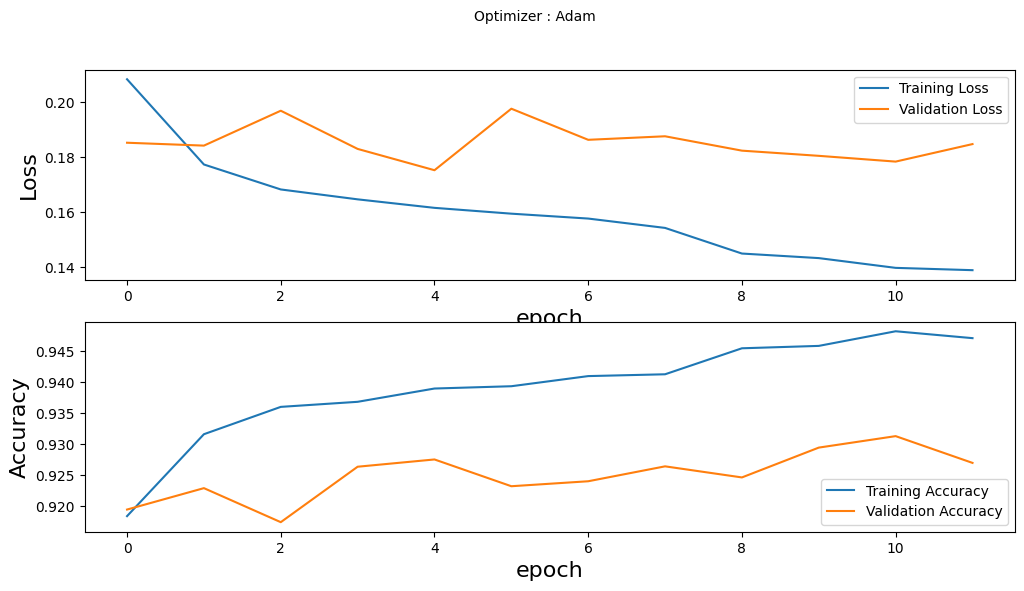

In [33]:
plt.style.use('default')

plt.figure(figsize=(12,6))
plt.subplot(2, 1, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('epoch', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('epoch', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [11]:
# Model Evaluation

In [12]:
acc_tr, loss_tr = model.evaluate_generator(train_data)
print(acc_tr)
print(loss_tr)

C:\Users\Swopnil\AppData\Local\Temp\ipykernel_12328\713691994.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc_tr, loss_tr = model.evaluate_generator(train_data)

KeyboardInterrupt



In [ ]:
acc_vr, loss_vr = model.evaluate_generator(validation_data)
print(acc_vr)
print(loss_vr)

In [ ]:
acc_test, loss_test = model.evaluate_generator(test_data)
print(acc_tr)
print(loss_tr)